# Compiling the different versions of Micro-Aevol 2

In [2]:
import os
import subprocess

KOKKOS_LIB_CMAKE = "Kokkos_DIR={0}/lib/cmake/Kokkos".format(os.environ.get("KOKKOS_INSTALL_DIR"))
print(KOKKOS_LIB_CMAKE)

EXE_NAME = "micro_aevol_kokkos"

Kokkos_DIR=/home/onyr/Kokkos/kokkos_install/lib/cmake/Kokkos


In [28]:
# parameters
experiment_params = {
    "dna_sizes": [100, 250, 500], # size of DNA
    "mutation_rates": [0.000001, 0.00001, 0.0001, 0.001], # mutation rate
    "world_sizes": [32, 64, 128, 256], # size of the world
}

# get project names from dirs in ./aevols directory
project_names = [d for d in os.listdir("./aevols") if os.path.isdir(os.path.join("./aevols", d))]
project_names.sort()
print(project_names)
nb_host_threads = 8

['aevol_0', 'aevol_1', 'aevol_2', 'aevol_3', 'aevol_4']


### Prepare tracing

In [4]:
csv_result_file = "stats.csv"
csv_headers = {
    'world_size_width': int,
    'world_size_height': int,
    'dna_size': int,
    'mutation_rate': float,
    'nb_generations': int,
    'runtime' : float
}

repeats = 5

In [5]:
import os
import subprocess

def create_csv_file(dirpath: str):
    filepath = dirpath + csv_result_file
    print(f"Creating NEW CSV file ({filepath})")
    f = open(filepath, "w")
    f.write(",".join(csv_headers.keys()) + "\n")
    f.close()

def clean_and_mkdir(dirpath: str):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
    else:
        print(f"{dirpath} directory already exists")
        print(f"removing previous {dirpath} directory")
        subprocess.run(["rm", "-rf", dirpath])
        os.makedirs(dirpath)

### ⚠ Danger zone ⚠

In [23]:
# clean, create dir and create csv file
for project_name in project_names:
    # create csv file
    stats_dir = "./aevols/" + project_name + "/stats/"
    clean_and_mkdir(stats_dir)
    create_csv_file(stats_dir)

./aevols/aevol_4/stats/ directory already exists
removing previous ./aevols/aevol_4/stats/ directory
Creating NEW CSV file (./aevols/aevol_4/stats/stats.csv)


In [40]:
# erase previous build
for project_name in project_names:
    build_dir = "./aevols/" + project_name + "/build/"
    if os.path.exists(build_dir):
        print(f"removing previous {build_dir} directory")
        subprocess.run(["rm", "-rf", build_dir])

removing previous ./aevols/aevol_4/build/ directory


## Compiling & Run executables

In [24]:
# compile
project_names =['aevol_4']
for project_name in project_names:
    build_dir = "./aevols/" + project_name + "/build/"

    # check if build/Makefile exists
    if not os.path.exists(build_dir + "Makefile"):
        clean_and_mkdir(build_dir)
        print(f"Creating new Makefile in {build_dir}")
    
        # run cmake to generate makefiles
        #subprocess.run(["cmake", "-B", f"./aevols/{project_name}/build", "-S", f"./aevols/{project_name}", "-D", KOKKOS_LIB_CMAKE, "-DCMAKE_BUILD_TYPE=Debug"])
        subprocess.run(["cmake", "-B", f"./aevols/{project_name}/build", "-S", f"./aevols/{project_name}", "-D", KOKKOS_LIB_CMAKE, "-DCMAKE_BUILD_TYPE=Release"])


    # run make to compile
    subprocess.run(["make", "-C", f"./aevols/{project_name}/build"])

make: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
make[1]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
make[2]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
Consolidate compiler generated dependencies of target micro_aevol
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
make[2]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
[  8%] Building CXX object CMakeFiles/micro_aevol.dir/Abstract_ExpManager.cpp.o
[ 16%] Building CXX object CMakeFiles/micro_aevol.dir/ExpManager.cpp.o
[ 25%] Building CXX object CMakeFiles/micro_aevol.dir/DnaMutator.cpp.o
[ 33%] Building CXX object CMakeFiles/micro_aevol.dir/Organism.cpp.o
[ 41%] Building CXX object CMakeFiles/micro_aevol.dir/Stats.cpp.o
[ 50%] Building CXX object CMakeFiles/micro_aevol.dir/Dna.cpp.o


/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/Dna.cpp(143): warning #177-D: variable "seq_dupl_size" was declared but never referenced



[ 58%] Linking CXX static library libmicro_aevol.a
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
[ 83%] Built target micro_aevol
make[2]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
make[2]: Entering directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
[ 91%] Building CXX object CMakeFiles/micro_aevol_kokkos.dir/main.cpp.o
[100%] Linking CXX executable micro_aevol_kokkos
make[2]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
[100%] Built target micro_aevol_kokkos
make[1]: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'
make: Leaving directory '/home/onyr/Documents/code/OT5_micro-aevol2/src/aevols/aevol_4/build'


In [25]:
# execute
run_once = False
project_names = ['aevol_4'] # select just one
NB_REPEAT = 1
for project_name in project_names:
    for dna_size in experiment_params["dna_sizes"]:
        for mutation_rate in experiment_params["mutation_rates"]:
            for world_size in experiment_params["world_sizes"]:
                for _ in range(NB_REPEAT):
                    print("Running {} with dna_size={}, mutation_rate={}, world_size={}".format(project_name, dna_size, mutation_rate, world_size))
                    
                    # prepare arguments
                    current_dir = os.getcwd()
                    program_filepath = current_dir + "/aevols/" + project_name + "/build/" + EXE_NAME
                    args = (program_filepath, 
                        "-w", str(world_size), 
                        "-h", str(world_size),
                        "-g", str(dna_size),
                        "-m", str(mutation_rate),
                    )
                    if project_name == "aevol_4":
                        args += ("-t", str(nb_host_threads),)

                    # run the executable
                    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                    popen.wait()

                    # run once only
                    if run_once:
                        break
                if run_once:
                    break
            if run_once:
                break
        if run_once:
            break
    if run_once:
        break

Running aevol_4 with dna_size=100, mutation_rate=1e-06, world_size=32
Running aevol_4 with dna_size=100, mutation_rate=1e-06, world_size=64
Running aevol_4 with dna_size=100, mutation_rate=1e-06, world_size=128
Running aevol_4 with dna_size=100, mutation_rate=1e-06, world_size=256
Running aevol_4 with dna_size=100, mutation_rate=1e-05, world_size=32
Running aevol_4 with dna_size=100, mutation_rate=1e-05, world_size=64
Running aevol_4 with dna_size=100, mutation_rate=1e-05, world_size=128
Running aevol_4 with dna_size=100, mutation_rate=1e-05, world_size=256
Running aevol_4 with dna_size=100, mutation_rate=0.0001, world_size=32
Running aevol_4 with dna_size=100, mutation_rate=0.0001, world_size=64
Running aevol_4 with dna_size=100, mutation_rate=0.0001, world_size=128
Running aevol_4 with dna_size=100, mutation_rate=0.0001, world_size=256
Running aevol_4 with dna_size=100, mutation_rate=0.001, world_size=32
Running aevol_4 with dna_size=100, mutation_rate=0.001, world_size=64
Running ae

# Graphs & Analysis

In [30]:
# get the data from aevol/*/stats/stats.csv
import pandas as pd
from IPython.display import display

df = pd.DataFrame()
for project_name in project_names:
    stats_dir = "./aevols/" + project_name + "/stats/"

    # add a version column with project_name
    df_stats = pd.read_csv(stats_dir + csv_result_file)
    df_stats["version"] = project_name

    # append to data
    df = df.append(df_stats, ignore_index=True)

display(df)
print(df.shape)
print(df["version"].unique())
print(df["mutation_rate"].unique())

/tmp/ipykernel_71911/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stats, ignore_index=True)
/tmp/ipykernel_71911/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stats, ignore_index=True)
/tmp/ipykernel_71911/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stats, ignore_index=True)
/tmp/ipykernel_71911/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_stats, ignore_index=True)
/tmp/ipykernel_71911/1363348757.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a

,world_size_width,world_size_height,dna_size,mutation_rate,nb_generations,runtime,version
0,32,32,100,0.000001,1000,0.138851,aevol_0
1,32,32,100,0.000001,1000,0.135755,aevol_0
2,32,32,100,0.000001,1000,0.135873,aevol_0
3,32,32,100,0.000001,1000,0.133202,aevol_0
4,32,32,100,0.000001,1000,0.130913,aevol_0
...,...,...,...,...,...,...,...
441,256,256,500,0.000100,1000,234.817481,aevol_4
442,32,32,500,0.001000,1000,7.001411,aevol_4
443,64,64,500,0.001000,1000,35.848574,aevol_4
444,128,128,500,0.001000,1000,176.259826,aevol_4


(446, 7)
['aevol_0' 'aevol_1' 'aevol_2' 'aevol_3' 'aevol_4']
[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


{'aevol_0': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 'aevol_1': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), 'aevol_2': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), 'aevol_3': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), 'aevol_4': (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)}


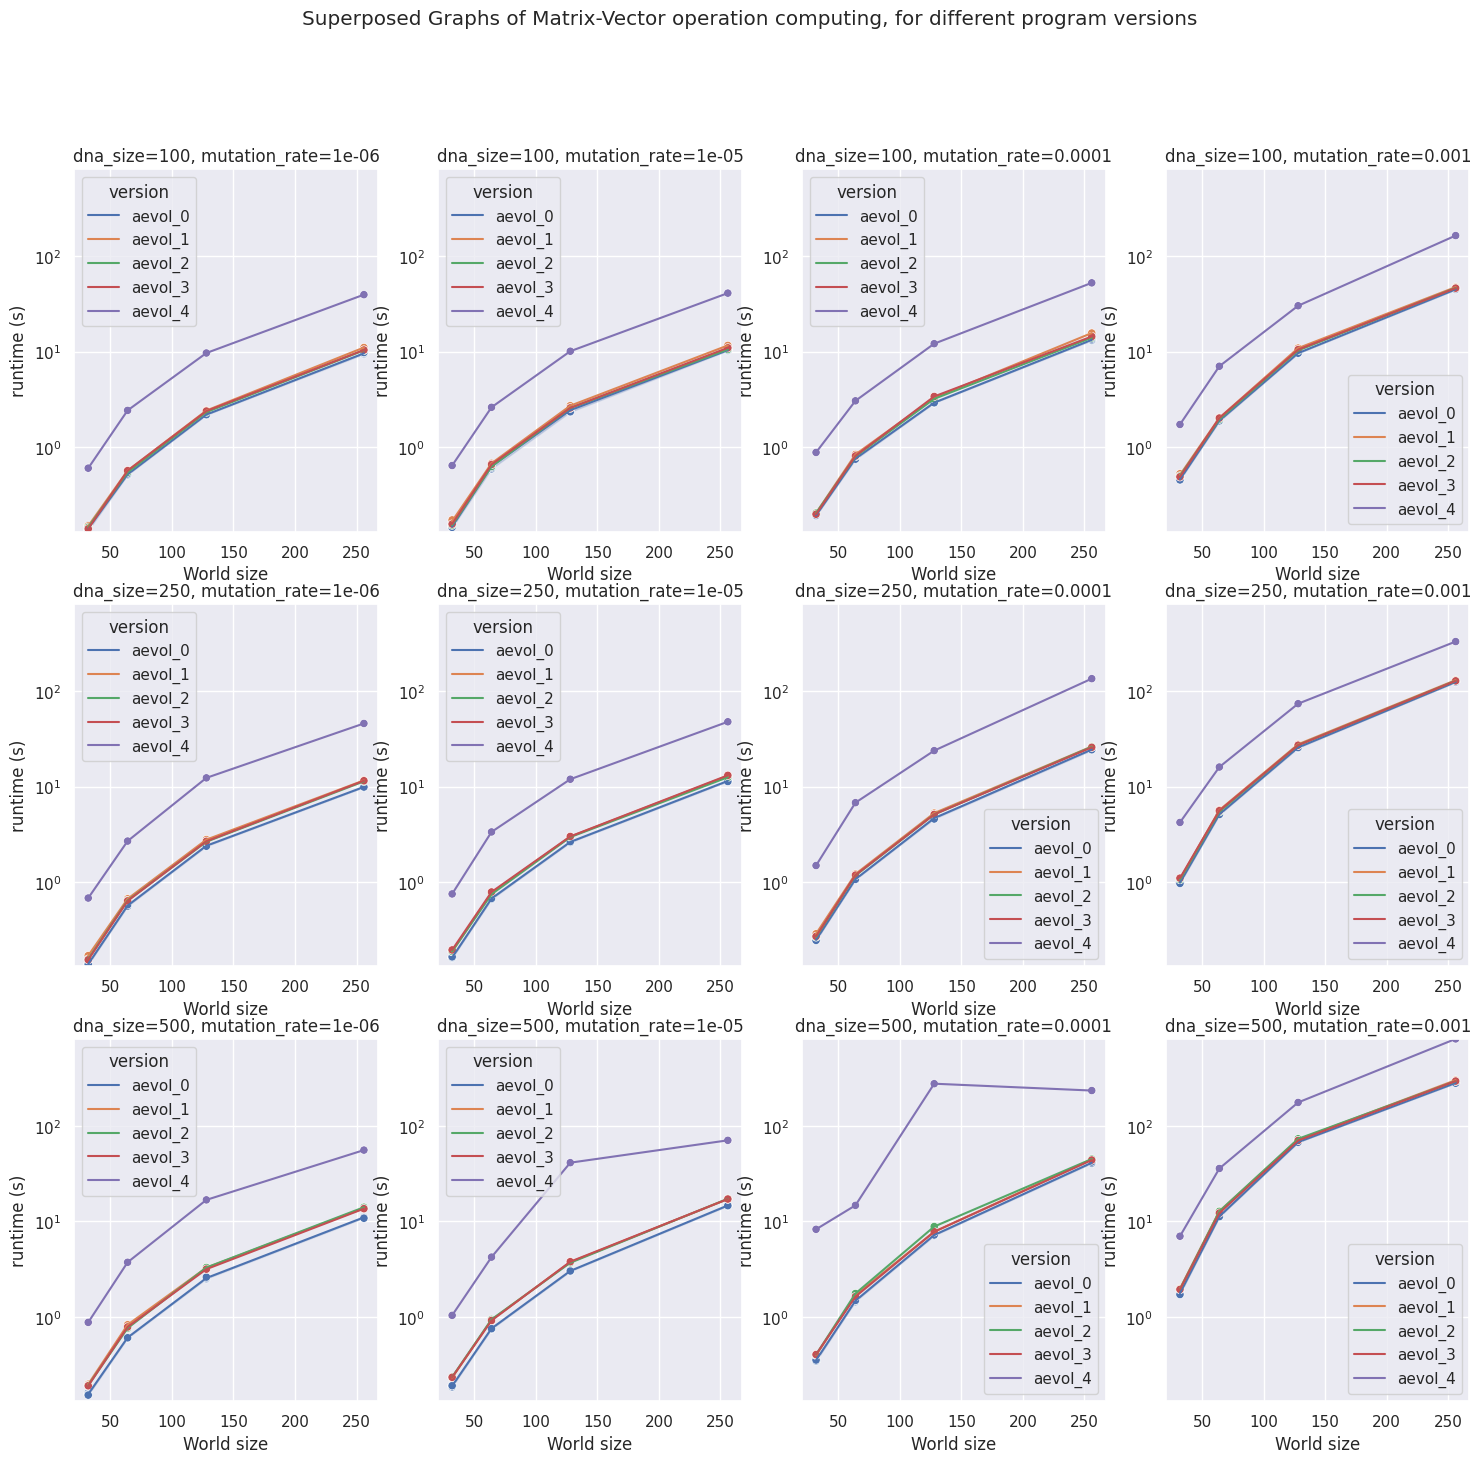

In [31]:
# plot the data
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

sns.set()

# filter out 0 runtime values
df = df[df.runtime > 0]

# create a palette for every version
palette = itertools.cycle(sns.color_palette(
    n_colors=len(project_names),
))
version_palette = {}
for project_name in project_names:
    version_palette[project_name] = next(palette)
print(version_palette)


# display the graph
def display_graph(df: pd.DataFrame):
    COLUMNS = len(experiment_params["mutation_rates"])
    ROWS = len(experiment_params["dna_sizes"])

    # display graphs
    fig, ax = plt.subplots(ROWS, COLUMNS, figsize=(18,16))
    fig.suptitle("Superposed Graphs of Matrix-Vector operation computing, for different program versions")

    for i in range(ROWS):
        dna_size = experiment_params["dna_sizes"][i]

        for j in range(COLUMNS):
            mutation_rate = experiment_params["mutation_rates"][j]

            for k in range(0, len(version_palette.keys())):
                # print version graph data
                graph_version = list(version_palette.keys())[k]
                
                # filter out data
                df_plot_0 = df[df['version'] == graph_version]
                df_plot_1 = df_plot_0[df_plot_0['dna_size'] == dna_size]
                df_plot_2 = df_plot_1[df_plot_1['mutation_rate'] == mutation_rate]
                
                g0 = sns.lineplot(
                    ax=ax[i][j],
                    data=df_plot_2, 
                    x="world_size_width",
                    y="runtime", 
                    hue="version",
                    palette=version_palette,
                    style="version",
                )
                g0.set(ylim=(df.runtime.min(), df.runtime.max()))
                g0.set(yscale="log")
                g0.set(title=f"dna_size={dna_size}, mutation_rate={mutation_rate}")
                g0.set(xlabel="World size", ylabel="runtime (s)")
                g00 = sns.scatterplot(
                    ax=ax[i][j],
                    data=df_plot_2, 
                    x="world_size_width",
                    y="runtime", 
                    hue="version",
                    palette=version_palette,
                    legend=False,
                )
                g00.set(ylim=(df.runtime.min(), df.runtime.max()))
                g00.set(yscale="log")
        
    plt.show()


display_graph(df)

#### Aevol 1 optimization: bitset
The bitset optimisation is useful when the mutation rate increases. This is because it optimizes the copies and data handling. However, a simple vector is still better for small values of the params.